# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64\Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Learning Algorithm

In the next code cell, you will use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Episode 10	Score: 2.05	Average Score over window: 1.06
Episode 20	Score: 6.17	Average Score over window: 2.69
Episode 30	Score: 16.33	Average Score over window: 5.83
Episode 40	Score: 30.90	Average Score over window: 10.86
Episode 50	Score: 35.09	Average Score over window: 15.35
Episode 60	Score: 35.71	Average Score over window: 18.73
Episode 70	Score: 37.55	Average Score over window: 21.30
Episode 80	Score: 37.60	Average Score over window: 23.31
Episode 90	Score: 37.17	Average Score over window: 24.90
Episode 100	Score: 37.51	Average Score over window: 26.16
Episode 110	Score: 37.69	Average Score over window: 29.79
Episode 111	Score: 37.98	Average Score over window: 30.15
Environment solved in 11 episodes!	Average Score: 30.15


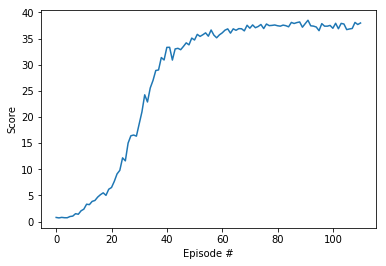

In [5]:
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
agent = Agent(state_size, action_size, num_agents, random_seed=11)
#import pdb; 
def ddpg(n_episodes=1000):
    """Deep deterministic policy gradient.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    N=100                            # Contains size of scoring window
    scores = []                      # list containing scores from each episode
    scores_window = deque(maxlen=N)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        agent.reset()                                     # reset the agent(s)
        state = env_info.vector_observations              # get the current state
        score = 0                                         # initialize/reset score
        max_t = 1000                                      # stop trajectory after max_t steps
        learn_t = 10                                      # call learning function after learn_t steps
        
        for t_step in range(max_t):            
            action = agent.act(state)                   # agent takes action
            env_info = env.step(action)[brain_name]     # send the action to the environment
            next_state = env_info.vector_observations   # get the next state
            reward = env_info.rewards                   # get the reward
            done = env_info.local_done                  # see if episode has finished
            for experience_tuple in zip(state, action, reward, next_state, done):
                agent.step(*experience_tuple)           # update agent with experience tuple
            state = next_state                          # update state
            score += np.sum(reward)                     # update total score
            if (t_step % learn_t) == 0: agent.perform_learning()
            if np.any(done): break

        score /= num_agents
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score

        # Print Score while training
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score over window: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tScore: {:.2f}\tAverage Score over window: {:.2f}'.format(i_episode, score, np.mean(scores_window)))
        # Stop when required average score of 30 is reached
        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-N, np.mean(scores_window)))           
            torch.save(agent.actor_local.state_dict(), 'weights_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'weights_critic.pth')
            break
    return scores

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [6]:
env.close()

### 4. Ideas for Future Work

The implementation is essentially a partial implementation of D4PG, so a natural idea for future work is to implement the full algorithm as in the [D4PG paper](https://arxiv.org/abs/1804.08617). This would include adding a prioritized replay buffer and trying out n-step returns when training the critic. As well, it would be interesting to benchmark my implementation to other algorithms such as PPO or TRPO.